# Group Project 1: Sell in May and go away

This report examines the value of  a common statement, sell in May and go away. In this report, data is utilized to show that this statement may not always be the most appropriate piece of advice. Although there are some possible reasons supporting this statement, such as summer vacation and a lower number of traders, there is still potential to make returns in spite of this.

SIM = Sell in May, buy back in November


SIN = Sell in November, buy back in May

## Data-free explanation

For a long time the idea of selling in May has been a common statement within the investment community. In spite of historical evidence, our group has decided that the old sell in May adage is not as applicable as it may have been over certain periods of time. 
There are a few potential reasons suggesting that this piece of advice is effective. One reason may be that a high volume of selling will correlate with a high level of outbound travel during the summer months, thereby leading to less trading overall. Not just the level of travel, but also the duration of vacation time can impact trading levels (Bouman and Jacobsen, 2002). Another may be that the number of investors who believe that returns will be higher between November to April will apply the appropriate pressure to the market resulting in this happening (Kochman, 2014).

Consumer perception is instrumental in determining market prices. Assuming a number of shareholders take this piece of advice, the investors selling in May would drive prices down for stocks being sold. As a result of this it would make more sense for investors looking to jump into the market at lower prices to actually begin buying in May as a result of this behavior. This suggests that instead of leaving, another option might instead be to sell, but stay around and take advantage of buying in sectors that include stocks decreasing in prices due to others selling. Another aspect to consider in relation to consumer perception is the idea of younger investors. With even greater access to trading now for the younger generations it makes it more likely that typical trading patterns will shift to accommodate different life patterns and knowledge of stock market history. Access to applications like Robinhood make it possible to trade on the go and Robinhood specifically is accessible for the most part in other countries. This negates the idea that selling is done ahead of the holiday months, but rather with e-trading buying and selling can just as easily take place during the summer months.

Aside from the market, another reason this piece of advice is not as important is that the growth of the investment market has led to a variety of new investor types. New types of investors means that there would be a greater variety in terms of time horizon. Typically a longer time horizon allows for investors to take greater risk with a longer time to build up a portfolio before returns are needed. Historically, there has been data that has shown that the May to October period provides investors with a lower return in comparison to the November to April period. However, with more investors participating in the market, it is important to note that those with longer time horizons should follow this advice and sell, especially if they are able to hold for a longer period. Investors with a shorter time horizon may want to follow this advice if returns are needed sooner rather than later. Instead of selling, their ability to be more risky may instead allow for further portfolio diversification and the chance to garner even greater returns by selling and then buying in a different sector instead. 

Past data has shown that the sell in May strategy still holds some merit within the past decade (Kochman, 2014). Given that the investor has a time horizon that requires them to liquidate quickly and general fear of lower returns are reasons to consider this strategy. There are negatives to following the strategy blindly. This past year is a good example of this, with returns increasing during the summer months as a result of federal stimulus and other factors. More importantly, though returns may be lower, they historically are not as low as the statement implies. Instead, staying invested has led to outperformance in most years as opposed to the fully liquidated investor (Duré, 2021). Beyond that, continuously selling in April can lead to a build up of short-term capital gains tax payments that offset any potential gains made by liquidating before the summer months. 

At the end of the day, active investors should consider all the relevant factors when it comes to making these decisions about their portfolios. Ultimately, our group believes that following this piece of advice blindly is not the best choice. Considering individual time horizons, levels of risk and current market conditions will play a role when making decisions each year. The decision to sell in May should come as a result of proper consideration of personal circumstances.


## Data-driven explanation

In order to determine the viability of the statement, we decided to first look at a breakdown of market data between the period of 1926 to 2020. The market returns of this period were subsequently grouped by month in order to see the average return over this period by month.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import mplfinance as mpf
import datetime as dt
import pandas_datareader as pdr
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec

np.seterr(divide='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
ff = pdr.get_data_famafrench('F-F_Research_Data_Factors_daily', start='1900')[0]
ff['Mkt'] = ff['Mkt-RF'] + ff['RF']
ff

,Mkt-RF,SMB,HML,RF,Mkt
Date,,,,,
1926-07-01,0.10,-0.23,-0.28,0.009,0.109
1926-07-02,0.45,-0.34,-0.03,0.009,0.459
1926-07-06,0.17,0.29,-0.38,0.009,0.179
1926-07-07,0.09,-0.59,0.00,0.009,0.099
1926-07-08,0.21,-0.38,0.18,0.009,0.219
...,...,...,...,...,...
2021-08-25,0.26,-0.04,0.34,0.000,0.260
2021-08-26,-0.66,-0.40,-0.31,0.000,-0.660
2021-08-27,1.08,1.62,0.30,0.000,1.080


Now that we have the data set, obtained from the Ken French data, we can group the returns in the Mkt column to see returns grouped by month.

In [3]:
def totret(r):
    return (r+1).prod() - 1

In [4]:
spy = ff[['Mkt']].div(100).resample('M').agg(totret)
spy['Month'] = spy.index.month
spy.rename(columns = {'Mkt':'Returns'},inplace=True)
spy_mean = spy['Returns'].mean()
spy['Month Name'] = spy.index.strftime('%b')
m_ret = spy.groupby('Month').mean()
m_ret

,Returns
Month,
1,0.014921
2,0.006054
3,0.006771
4,0.015150
5,0.005063
6,0.009344
7,0.015877
8,0.012119
9,-0.006858


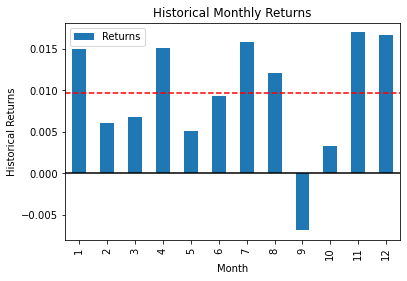

In [5]:
m_ret.plot(kind = 'bar')
plt.xlabel('Month')
plt.ylabel('Historical Returns')
plt.title('Historical Monthly Returns')
plt.axhline(y = spy_mean, color = 'r', linestyle = '--')
plt.axhline(y = 0, color = 'black', linestyle = '-')
plt.show() 

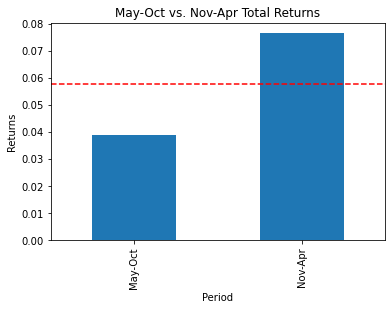

In [6]:
grouped_returns = m_ret.copy()
grouped_returns['Month'] = grouped_returns.index
grouped_returns['Period'] = np.where((grouped_returns['Month'] >= 5) & (grouped_returns['Month'] < 11) , 'May-Oct', 'Nov-Apr')
grouped_graph = grouped_returns.groupby('Period').sum()
# remember to annualize the return based on the resampling of spy_2
plt.ylabel('Returns')
plt.title('May-Oct vs. Nov-Apr Total Returns')
grouped_graph['Returns'].plot.bar()
spy_mean_2 = grouped_graph['Returns'].mean()
plt.axhline(y = spy_mean_2, color = 'r', linestyle = '--')
plt.show()

The dashed red line indicates the average monthly returns.

These graphs show that returns from May to October are below average with an average of 3.87% compared to 7.65% of November to April. However, there are instances of lower returns in November to April periods. January, November, and December produced highest monthly returns. While May, September, and October fall in line with the statement by showing lower returns. In fact, only two months during May-Oct produced above average returns. It is clear that the May-Oct period does not have the same returns as Nov-Apr.

It is worth noting the exterme negative level of returns occuring in September. This could be an effect of sell in May with the many investors that had left for vacation in the process of returning from summer vacation in September deciding to liquidate their portfolios, but it could also be a result of the data including the stock market effect from the Lehman Brothers bankruptcy that occured in September. This potential combination of factors helps to explain the negative returns in September. 

Further analysis was done by looking at returns for $1 invested into the market during the same period. The returns for this were split into cumulative returns, returns if a sell in May strategy was taken each year, and returns if a sell in November strategy was taken. A comparison between these two would show whether or not there was a difference between these strategies in terms of cumulative return.

In [7]:
def one_dollar_no_rf (start, end):
    spy_2 = ff[['Mkt', 'RF']].div(100).loc[start:end]
    spy_2['Cumu Returns'] = spy_2['Mkt'].add(1).cumprod()
    spy_2.rename(columns = {'Mkt':'Returns'},inplace=True)
    spy_2['Month'] = spy_2.index.month
    spy_2['SIM Returns'] = np.where((spy_2['Month'] >= 5) & (spy_2['Month'] < 11), 0, spy_2['Returns'])
    spy_2['SIN Returns'] = np.where((spy_2['Month'] >= 5) & (spy_2['Month'] < 11), spy_2['Returns'], 0)
    spy_2['SIM Cumu Returns'] = spy_2['SIM Returns'].add(1).cumprod()
    spy_2['SIN Cumu Returns'] = spy_2['SIN Returns'].add(1).cumprod()
    spy_2['Period'] = np.where((spy_2['Month'] >= 5) & (spy_2['Month'] < 11) , 'May-Oct', 'Nov-Apr')
    plt.plot(spy_2['Cumu Returns'])
    plt.plot(spy_2['SIM Cumu Returns'])
    plt.plot(spy_2['SIN Cumu Returns'])
    plt.legend(['Hold!', 'Buy and Sell (May)','Buy and Sell (Nov)'], loc ="upper left")
    plt.ylabel('Returns')
    plt.xlabel('Year')
    plt.title('$1 Cumulative Returns ' + 'Between ' + start + ' and ' + end)
    plt.show()
    print(spy_2[['Cumu Returns','SIM Cumu Returns','SIN Cumu Returns']].iloc[-1])

The function 'one_dollar_no_rf' calculates and plots what one dollar invested in the 'start' date will yield by the 'end' date. This function assumes the investor does not do anything with the cash in the months between May and October. 

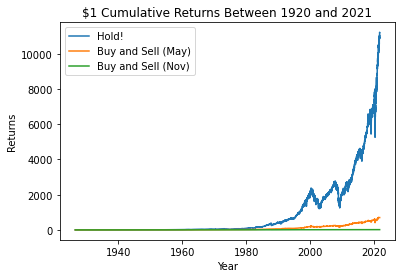

Cumu Returns        11204.390055
SIM Cumu Returns      701.070512
SIN Cumu Returns       15.981830
Name: 2021-08-31 00:00:00, dtype: float64


In [8]:
one_dollar_no_rf('1920','2021')

Simply put, taking the advice of selling in may and going away, in the long run, is not as profitable as simply holding your stocks. The graph above shows the difference between three different strategies. It is clear that holding your position is far more beneficial to an investor that is looking to invest for his great-great granchild. Selling in "November and becoming a non-member" (corollary of 'sell in May and go away') returns only $15 on a one dollar investment over a roughly 100 year time period.

SIM on the other hand returns a pretty modest $701. This shows the potential to still make a return with a sell in May strategy versus to sell in November.

While that may seem like a decent return, doing absolutely nothing returns $10766. What makes this amount even more impressive is the fact that there are zero transaction costs associated with the strategy. While if an investor were to buy and sell twice a year, they could see a significant chunk of their money dissapear due to the compounding effect of small incremental losses. What this exemplifies is that holding money in the market and allowing it to grow overtime is key in making a high return. This could suggest that instead of selling in May it may be a potential strategy to hold. This also suggests that instead of investing more money in the stocks that are being held, the investor could instead turn to other sectors or opportunities such as bonds.

We decided to then split our analysis into 3 roughly equally long periods over the span of our data to see if there was a period that would appear to favor SIM. In each of the 30 year period, it is clear that  holding your stock is the superior strategy. However, the time period with the least variance is 1991-2021. This time period is unique in the sense that it has had 3 once-in-a-century stock market crashes. It appears that when there is high volatility paired with constant negative returns, selling and waiting for better times is a decent strategy. However, there is no real way of predicting future returns, so this strategy is futile. 

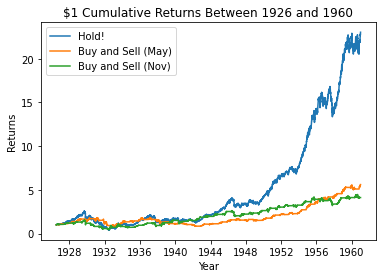

Cumu Returns        23.021847
SIM Cumu Returns     5.597283
SIN Cumu Returns     4.113039
Name: 1960-12-30 00:00:00, dtype: float64


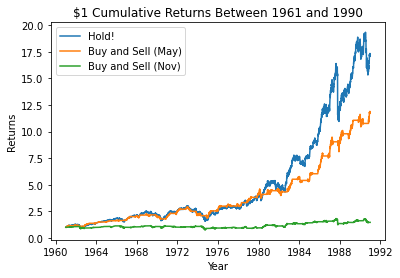

Cumu Returns        17.314896
SIM Cumu Returns    11.867510
SIN Cumu Returns     1.459017
Name: 1990-12-31 00:00:00, dtype: float64


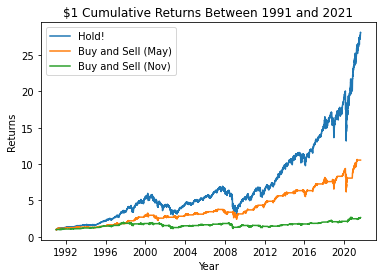

Cumu Returns        28.107884
SIM Cumu Returns    10.554187
SIN Cumu Returns     2.663197
Name: 2021-08-31 00:00:00, dtype: float64


In [9]:
one_dollar_no_rf('1926','1960')
one_dollar_no_rf('1961','1990')
one_dollar_no_rf('1991','2021')

Up to here, our analysis has been based on the assumption that the investor is a moron. They did not do anything with their cash during the summer months. This is explained with the 0 in the 'else' clause in the np.where function. FF coincidentally has a risk free column we can exploit. By replacing the 0 in the np.where function to the risk free rate, you will at least be gaining the risk free rate (government bonds). 

In [10]:
def one_dollar_yes_rf(start, end):
    spy_2 = ff[['Mkt', 'RF']].div(100).loc[start:end]
    spy_2['Cumu Returns'] = spy_2['Mkt'].add(1).cumprod()
    spy_2.rename(columns = {'Mkt':'Returns'},inplace=True)
    spy_2['Month'] = spy_2.index.month
    spy_2['SIM Returns'] = np.where((spy_2['Month'] >= 5) & (spy_2['Month'] < 11), spy_2['RF'], spy_2['Returns'])
    spy_2['SIN Returns'] = np.where((spy_2['Month'] >= 5) & (spy_2['Month'] < 11), spy_2['Returns'], spy_2['RF'])
    # given the investor invests the remaining cash in T-bills then
    spy_2['SIM Cumu Returns'] = spy_2['SIM Returns'].add(1).cumprod()
    spy_2['SIN Cumu Returns'] = spy_2['SIN Returns'].add(1).cumprod()
    spy_2['Period'] = np.where((spy_2['Month'] >= 5) & (spy_2['Month'] < 11) , 'May-Oct', 'Nov-Apr')
    plt.plot(spy_2['Cumu Returns'])
    plt.plot(spy_2['SIM Cumu Returns'])
    plt.plot(spy_2['SIN Cumu Returns'])
    plt.legend(['Hold!', 'Buy and Sell (May)','Buy and Sell (Nov)'], loc ="upper left")
    plt.ylabel('Returns')
    plt.xlabel('Year')
    plt.title('$1 Cumulative Returns ' + 'Between ' + start + ' and ' + end + ' w/ RF')
    plt.show()
    print(spy_2[['Cumu Returns','SIM Cumu Returns','SIN Cumu Returns']].iloc[-1])

Now, we can see that the margin between the strategies is closing. SIM now yields $3283. It is important to note however, that since 2015 the RF rate has plummeted to close to almost 0%. Still, holding the stock is still the better strategy.

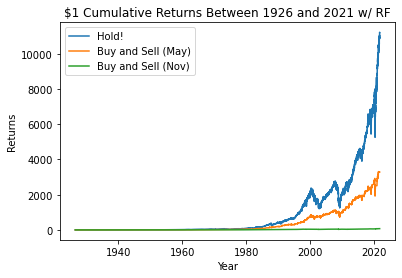

Cumu Returns        11204.390055
SIM Cumu Returns     3283.304628
SIN Cumu Returns       72.477843
Name: 2021-08-31 00:00:00, dtype: float64


In [11]:
one_dollar_yes_rf('1926','2021')

Knowing that SIM might only be profitable if there are historic negative returns, perhaps the periods where the Wall Street crash of 1929 and Great Depression, dot-com bubble, housing market crash, and COVID-19 pandemic occured could yield positive results for SIM. 

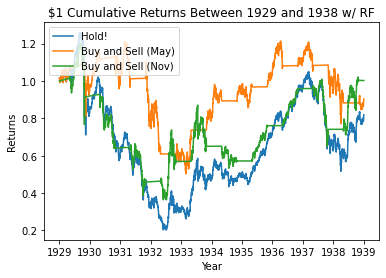

Cumu Returns        0.819442
SIM Cumu Returns    0.903864
SIN Cumu Returns    1.002823
Name: 1938-12-31 00:00:00, dtype: float64


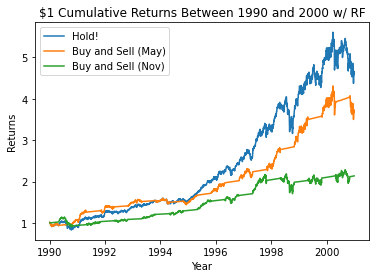

Cumu Returns        4.608409
SIM Cumu Returns    3.689563
SIN Cumu Returns    2.137440
Name: 2000-12-29 00:00:00, dtype: float64


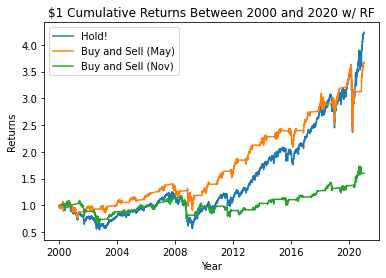

Cumu Returns        4.236518
SIM Cumu Returns    3.678432
SIN Cumu Returns    1.597263
Name: 2020-12-31 00:00:00, dtype: float64


In [12]:
one_dollar_yes_rf('1929','1938')
one_dollar_yes_rf('1990','2000')
one_dollar_yes_rf('2000','2020')

Although the margin is definitely closer over these periods, holding is simply the better strategy. Even when there is a 10 year period of extremely negative returns (Great Depression) holding yields identical results to both SIN or SIM.

In [13]:
spy_2 = ff[['Mkt', 'RF']].div(100)
spy_2['Cumu Returns'] = spy_2['Mkt'].add(1).cumprod()
spy_2.rename(columns = {'Mkt':'Returns'},inplace=True)
spy_2['Month'] = spy_2.index.month
spy_2['SIM Returns'] = np.where((spy_2['Month'] >= 5) & (spy_2['Month'] < 11), spy_2['RF'], spy_2['Returns'])
spy_2['SIN Returns'] = np.where((spy_2['Month'] >= 5) & (spy_2['Month'] < 11), spy_2['Returns'], spy_2['RF'])
spy_2['SIM Cumu Returns'] = spy_2['SIM Returns'].add(1).cumprod()
spy_2['SIN Cumu Returns'] = spy_2['SIN Returns'].add(1).cumprod()
spy_2['Period'] = np.where((spy_2['Month'] >= 5) & (spy_2['Month'] < 11) , 'May-Oct', 'Nov-Apr')
std = pd.DataFrame(spy_2[['Returns','SIM Returns','SIN Returns']].std()*np.sqrt(252)).T
std.rename(columns = {'Returns':'Returns Std'},inplace=True)
std.rename(columns = {'SIM Returns':'SIM Returns Std'},inplace=True)
std.rename(columns = {'SIN Returns':'SIN Returns Std'},inplace=True)
std

,Returns Std,SIM Returns Std,SIN Returns Std
0,0.17093,0.114864,0.126634


Given this new information, it could possibly be assumed that SIM is a less volatile investment strategy. By halfing the chance of us purchasing stock during historically negative stock returns, we essentially decrease our volatility. This is confirmed by the lower volatility (standard deviation) of returns. This means that if you are an investor that is risk averse, it could potentially be a better strategy for you. 

It is still worth noting again however, that these periods of extreme negative returns typically occur over short periods. Though the economy recovers over years, the sell in May strategy ultimately is only useful in these scenarios when stock market downturns are able to be predicted and accounted for (which is impossible). Though this strategy will reduce risk, it is still a matter of chance that this strategy can be put in play during these times.

## Conclusion

After close examination, we have determined that the statement sell in May and go away is not as applicable as it may have once been. Investors should consider their own situations to determine whether to sell or buy. As can be seen through our analysis that the sell in May strategy has been useful during periods of extreme economic downturn, however this is negated by the fact that these periods are unpredictable. 

Through our analysis it also appears that though there are periods within the May to October window that offer less than average returns, there are months within the summer time period that offer potential to make higher than average returns. What this suggests is that though sell in May is a viable strategy, it does not mean that it should be the only strategy. Differing time horizons and individual perception are individual factors that can affect how an investor approaches the market. Other alternatives should be considered and maintaining investment in other areas such as risk-free securities or the bond market in general is important. Individual level of risk as well will impact investment strategy. High-risk investors may shy away from the sell in May strategy and hold stocks while investing in different sectors, however they may experience lower returns during the summer months as a result. Lower-risk investors may stick with sell in May to mitigate loss of returns, which as shown can be helpful during extreme negative downturns, however the con is potential short-term gains tax payments.

Ultimately, the point is that different strategies are appropriate for different investors. Individual consideration of personal factors will impact the strategy that is taken and no one strategy should be followed blindly, especially not one that originated decades ago.

## Bibliography

Bouman, Sven, and Ben Jacobsen. “The Halloween Indicator, ‘Sell in May and Go Away’: Another Puzzle.” The American Economic Review, vol. 92, no. 5, 2002, pp. 1618–1635. JSTOR, www.jstor.org/stable/3083268. Accessed 4 Aug. 2021.

Duré, Elana. “Why You Shouldn't ‘Sell in May and Go Away’ This Year.” J.P. Morgan Chase, J.P. Morgan Chase, 26 May 2021, www.chase.com/personal/investments/learning-and-insights/article/sell-in-may-and-go-away#:~:text=The%20saying%2C%20which%20hints%20toward,months%20between%20November%20and%20April.

Kochman, Ladd, et al. “SELL IN MAY AND GO AWAY REVISITED.” The American Economist, vol. 59, no. 1, 2014, pp. 90–91., www.jstor.org/stable/43664764. Accessed 4 Aug. 2021.
